# Feature reduction (redundancy)

We are going to see if there is colinearity between the nutritional variables

**We strat with 41 variables**. There were more, but with previous knowledge we have delete them. For example, the specific types of fatty acids were removed.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
metadatos = pd.read_csv("NutrientMetadata.csv")

In [4]:
metadatos.head()

X.SampleID         KCAL        PROT       TFAT        CARB         MOIS  \
0  MCT.f.0001  1707.040193   95.668747  55.185318  187.965353  3848.605502   
1  MCT.f.0002  1970.043625  109.619765  53.615264  242.919015  3808.005721   
2  MCT.f.0003  1714.895330   89.992993  50.561373  234.225138  4183.622433   
3  MCT.f.0004  2487.232625   94.611953  92.021551  257.539030  4816.211548   
4  MCT.f.0005  2260.211176  110.268353  95.570253  165.608070  4404.243876   

        ALC     CAFF    THEO       SUGR  ...         LYCO           LZ  \
0  14.95872  331.520   0.000  84.468526  ...  4292.400000  1015.084700   
1  14.04000  378.880   0.000  74.208114  ...     0.000000   797.160625   
2   0.00000  378.880   9.472  67.474665  ...  2146.200000  2044.537500   
3  42.44800  379.430  20.240  83.960308  ...  5277.117000   659.294375   
4  43.93060  534.545  20.735  64.921966  ...  4070.199328  3726.710750   

        ATOC          VK       CHOLE       SFAT       MFAT       PFAT  \
0   5.709429   38.704504  193.148455  18.104675  22.043671   9.676532   
1   5.635238   49.068013  179.075500  18.429446  19.053080  10.773219   
2   5.586798   73.108225  150.879500  17.922190  17.790351  11.082590   
3  10.531568  264.002725  149.416500  20.909049  33.621689  32.220642   
4   8.144286  189.995874  366.883250  32.547474  32.895049  21.501892   

        VITD       CHOLN  
0   8.424643  374.445396  
1  23.931800  442.493000  
2   5.117800  352.901184  
3   9.486600  328.717550  
4   7.954950  414.724863  

[5 rows x 42 columns]

We have a column with samples IDs, we are going to store it for posterior add to the final table

In [5]:
ID = metadatos["X.SampleID"]

In [6]:
metadatos.drop("X.SampleID",axis="columns",inplace=True)

In [7]:
metadatos.head()

KCAL        PROT       TFAT        CARB         MOIS       ALC  \
0  1707.040193   95.668747  55.185318  187.965353  3848.605502  14.95872   
1  1970.043625  109.619765  53.615264  242.919015  3808.005721  14.04000   
2  1714.895330   89.992993  50.561373  234.225138  4183.622433   0.00000   
3  2487.232625   94.611953  92.021551  257.539030  4816.211548  42.44800   
4  2260.211176  110.268353  95.570253  165.608070  4404.243876  43.93060   

      CAFF    THEO       SUGR       FIBE  ...         LYCO           LZ  \
0  331.520   0.000  84.468526  19.797250  ...  4292.400000  1015.084700   
1  378.880   0.000  74.208114  14.419375  ...     0.000000   797.160625   
2  378.880   9.472  67.474665  25.996125  ...  2146.200000  2044.537500   
3  379.430  20.240  83.960308  26.178425  ...  5277.117000   659.294375   
4  534.545  20.735  64.921966  13.011350  ...  4070.199328  3726.710750   

        ATOC          VK       CHOLE       SFAT       MFAT       PFAT  \
0   5.709429   38.704504  193.148455  18.104675  22.043671   9.676532   
1   5.635238   49.068013  179.075500  18.429446  19.053080  10.773219   
2   5.586798   73.108225  150.879500  17.922190  17.790351  11.082590   
3  10.531568  264.002725  149.416500  20.909049  33.621689  32.220642   
4   8.144286  189.995874  366.883250  32.547474  32.895049  21.501892   

        VITD       CHOLN  
0   8.424643  374.445396  
1  23.931800  442.493000  
2   5.117800  352.901184  
3   9.486600  328.717550  
4   7.954950  414.724863  

[5 rows x 41 columns]

In [8]:
metadatos.columns

Index(['KCAL', 'PROT', 'TFAT', 'CARB', 'MOIS', 'ALC', 'CAFF', 'THEO', 'SUGR',
       'FIBE', 'CALC', 'IRON', 'MAGN', 'PHOS', 'POTA', 'SODI', 'ZINC', 'COPP',
       'SELE', 'VC', 'VB1', 'VB2', 'NIAC', 'VB6', 'FOLA', 'VB12', 'VARA',
       'RET', 'BCAR', 'ACAR', 'CRYP', 'LYCO', 'LZ', 'ATOC', 'VK', 'CHOLE',
       'SFAT', 'MFAT', 'PFAT', 'VITD', 'CHOLN'],
      dtype='object')

-----------------------------------------------

Let's look at a correlation matrix for all 41 variables

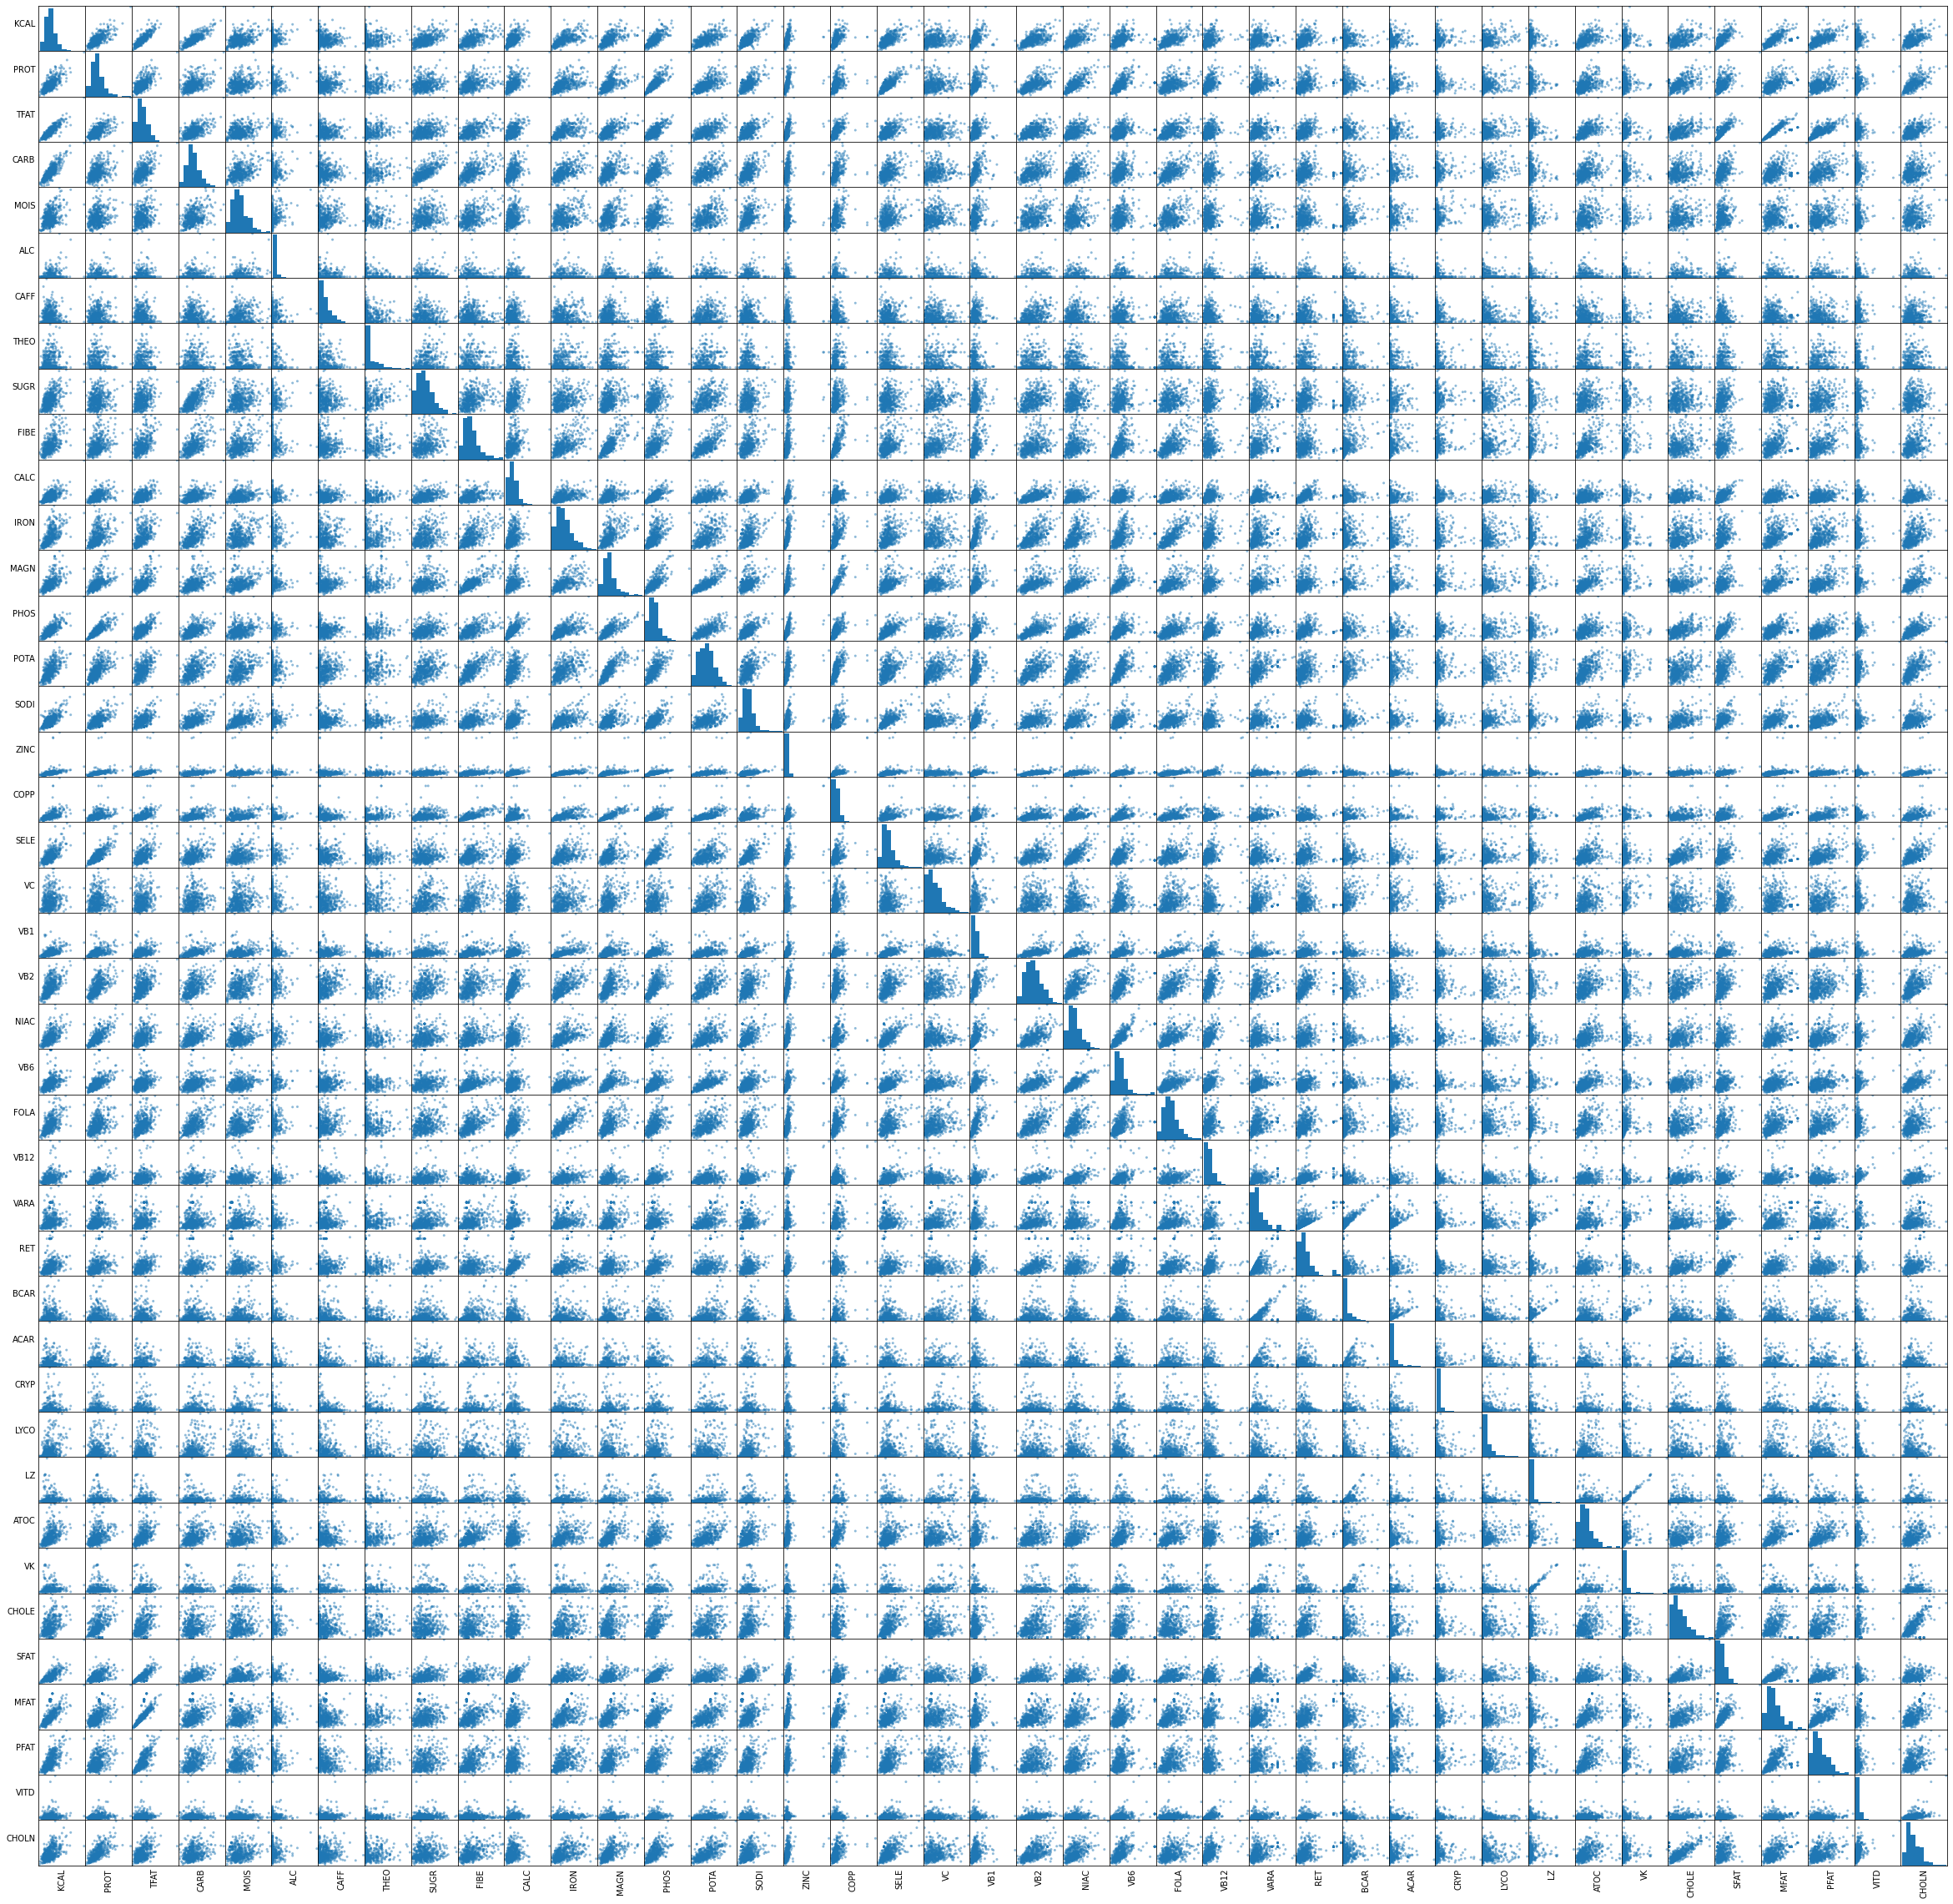

In [9]:
axs = pd.plotting.scatter_matrix(metadatos, figsize=(41, 41))
n = len(metadatos.columns)
for i in range(n):
    v = axs[i, 0]
    v.yaxis.label.set_rotation(0)
    v.yaxis.label.set_ha('right')
    v.set_yticks(())
    h = axs[n-1, i]
    h.xaxis.label.set_rotation(90)
    h.set_xticks(())

As we cannot see much in this graph, what we do is a variable correlation heatmap and we also save these values in a table.

In [10]:
tabla_correlaciones = metadatos.corr()
tabla_correlaciones.head()

KCAL      PROT      TFAT      CARB      MOIS       ALC      CAFF  \
KCAL  1.000000  0.734892  0.880715  0.837793  0.426896  0.299487 -0.040285   
PROT  0.734892  1.000000  0.647408  0.427503  0.279659  0.113692  0.053091   
TFAT  0.880715  0.647408  1.000000  0.577260  0.283872  0.066102 -0.098970   
CARB  0.837793  0.427503  0.577260  1.000000  0.411244  0.168906 -0.045816   
MOIS  0.426896  0.279659  0.283872  0.411244  1.000000  0.303431  0.154798   

          THEO      SUGR      FIBE  ...      LYCO        LZ      ATOC  \
KCAL  0.079372  0.537553  0.576020  ...  0.283579 -0.008199  0.500988   
PROT -0.053588  0.200203  0.393834  ...  0.136068  0.067782  0.358443   
TFAT  0.139353  0.335876  0.513806  ...  0.221877 -0.008814  0.569307   
CARB  0.103749  0.723841  0.598448  ...  0.330847 -0.022418  0.378049   
MOIS  0.013067  0.246324  0.426088  ...  0.174392  0.138983  0.252000   

            VK     CHOLE      SFAT      MFAT      PFAT      VITD     CHOLN  
KCAL  0.020702  0.453027  0.744789  0.665217  0.690868  0.132769  0.518848  
PROT  0.083171  0.556176  0.516503  0.519838  0.466925  0.307044  0.688427  
TFAT  0.033345  0.480347  0.808761  0.815599  0.777557  0.107608  0.515511  
CARB -0.011750  0.182814  0.504431  0.394912  0.489145  0.023628  0.252966  
MOIS  0.146354  0.203299  0.287459  0.089523  0.315730  0.062794  0.173348  

[5 rows x 41 columns]

<AxesSubplot:>

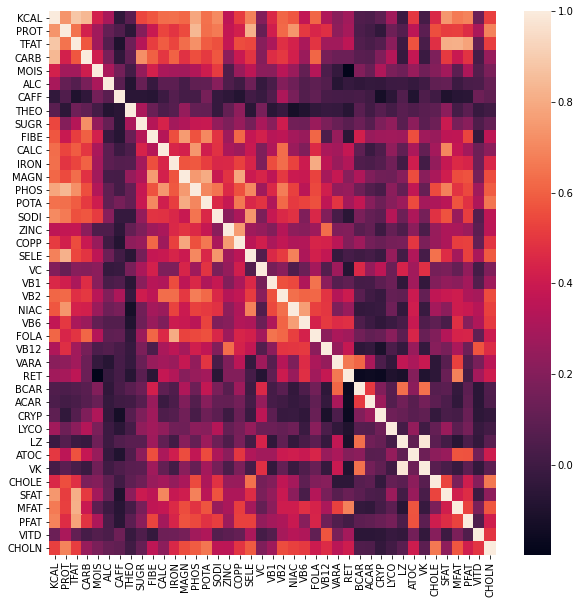

In [11]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(metadatos.corr(),xticklabels=True, yticklabels=True)

In [12]:
#Correlation >0.5
for columna in tabla_correlaciones.columns:
    print(str(columna)+": "+str(tabla_correlaciones[tabla_correlaciones[columna]>0.5].shape[0]-1))

KCAL: 21
PROT: 15
TFAT: 17
CARB: 11
MOIS: 1
ALC: 0
CAFF: 0
THEO: 0
SUGR: 2
FIBE: 11
CALC: 6
IRON: 12
MAGN: 14
PHOS: 19
POTA: 16
SODI: 9
ZINC: 2
COPP: 10
SELE: 10
VC: 0
VB1: 4
VB2: 14
NIAC: 11
VB6: 6
FOLA: 10
VB12: 3
VARA: 3
RET: 2
BCAR: 4
ACAR: 1
CRYP: 0
LYCO: 0
LZ: 2
ATOC: 7
VK: 2
CHOLE: 5
SFAT: 8
MFAT: 11
PFAT: 10
VITD: 1
CHOLN: 12


We are going to keep __alc, caff, theo, mois (mois-sodium 0.51), vc, cryp, lyco y vitd (vitd-VB12 0.57)__ becasue it does not have a strong linear relathionship with any variable or the relationship is very close to 0.5 (like mois with sodi)

We can remove __KCAL__ because is strogly related with most of the variables

In [13]:
columnas_quitar = ["KCAL"]
metadatos_relacionados = metadatos.drop(columnas_quitar,axis="columns")

------------------------------------

<AxesSubplot:>

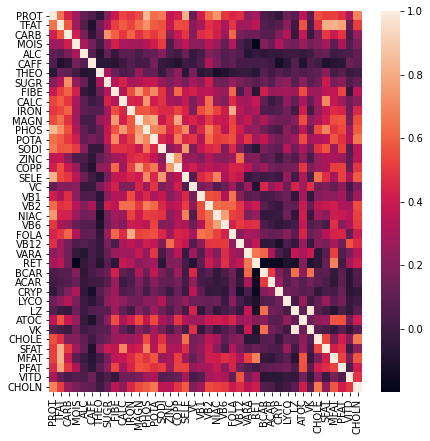

In [14]:
fig, ax = plt.subplots(figsize=(7,7)) 
sns.heatmap(metadatos_relacionados.corr(),xticklabels=True, yticklabels=True)

We can see that there are some variables that are related in a low way or not at all with many of the variables in the heatmap (such as LZ and ACAR).

However, we are going to make sure by varying the correlation treshold and discarding the variables that are most correlated. (only 1 from pair) until trying to run out of redundant variables

------------------------------------

__Values >0.9__

In [15]:
tabla_relac = metadatos_relacionados.corr()
for columna in tabla_relac.columns:
    print(str(columna)+": "+str(tabla_relac[tabla_relac[columna]>0.9].shape[0]-1))

PROT: 0
TFAT: 0
CARB: 0
MOIS: 0
ALC: 0
CAFF: 0
THEO: 0
SUGR: 0
FIBE: 0
CALC: 0
IRON: 0
MAGN: 0
PHOS: 0
POTA: 0
SODI: 0
ZINC: 0
COPP: 0
SELE: 0
VC: 0
VB1: 0
VB2: 0
NIAC: 0
VB6: 0
FOLA: 0
VB12: 0
VARA: 0
RET: 0
BCAR: 0
ACAR: 0
CRYP: 0
LYCO: 0
LZ: 1
ATOC: 0
VK: 1
CHOLE: 0
SFAT: 0
MFAT: 0
PFAT: 0
VITD: 0
CHOLN: 0


We have only LZ-VitK with a relationship greater than 0.9. LZ are pigments and vitk is related with blood coagulation.

__Remove LZ and let vitamin K.__

In [16]:
metadatos_relacionados = metadatos_relacionados.drop("LZ",axis="columns")

In [17]:
len(metadatos_relacionados.columns)

39

----------------------------

__Values >0.8__

In [18]:
tabla_relac = metadatos_relacionados.corr()
for columna in tabla_relac.columns:
    print(str(columna)+": "+str(tabla_relac[tabla_relac[columna]>0.8].shape[0]-1))

PROT: 2
TFAT: 2
CARB: 0
MOIS: 0
ALC: 0
CAFF: 0
THEO: 0
SUGR: 0
FIBE: 0
CALC: 0
IRON: 0
MAGN: 1
PHOS: 1
POTA: 1
SODI: 0
ZINC: 0
COPP: 0
SELE: 1
VC: 0
VB1: 0
VB2: 0
NIAC: 0
VB6: 0
FOLA: 0
VB12: 0
VARA: 0
RET: 0
BCAR: 0
ACAR: 0
CRYP: 0
LYCO: 0
ATOC: 0
VK: 0
CHOLE: 0
SFAT: 1
MFAT: 1
PFAT: 0
VITD: 0
CHOLN: 0


We have 7 variables with a correlation over 0.8 with another variable:
 - __PROT (2)__: PHOS (0.83), SELE (0.82)
 - __MAGN (1)__: POTA (0.8)
 - __PHOS (1)__: PROT (0.83)
 - __POTA (1)__: MAGN (0.8)
 - __SELE (1)__: PROT (0.82)
 - __SFAT (1)__: TFAT (0.81)
 - __MFAT (1)__: TFAT (0.82)

We are going to remove PHOS, SELE, MFAT and PFAT.

We are keeping MAGN and POTA because they are important nutrients for the moos (microorganisms)

In [21]:
metadatos_relacionados = metadatos_relacionados.drop(["PHOS","SELE", "MFAT", "SFAT"],axis="columns")
len(metadatos_relacionados.columns)

35

-------------------------

__Values >0.7__

In [22]:
tabla_relac = metadatos_relacionados.corr()
for columna in tabla_relac.columns:
    print(str(columna)+": "+str(tabla_relac[tabla_relac[columna]>0.7].shape[0]-1))

PROT: 1
TFAT: 1
CARB: 1
MOIS: 0
ALC: 0
CAFF: 0
THEO: 0
SUGR: 1
FIBE: 2
CALC: 0
IRON: 1
MAGN: 3
POTA: 2
SODI: 0
ZINC: 1
COPP: 2
VC: 0
VB1: 0
VB2: 0
NIAC: 2
VB6: 1
FOLA: 1
VB12: 0
VARA: 0
RET: 0
BCAR: 0
ACAR: 0
CRYP: 0
LYCO: 0
ATOC: 0
VK: 0
CHOLE: 0
PFAT: 1
VITD: 0
CHOLN: 0


We have 13 variables with correlation over 0.8 with other variable:
 - __PROT (1)__: NIAC(0.73)
 - __CARB (1)__: SUGR(0.72)
 - __SUGR (1)__: CARB(0.72)
 - __FIBE (2)__: MAGN (0.75), POTA (0.7)
 - __IRON (1)__: FOLA (0.79)
 - __MAGN (3)__: POTA (0.8), FIBE (0.75), COPP (0.78)
 - __POTA (2)__: MAGN (0.8), FIBE (0.7)
 - __ZINC (1)__: COPP (0.75)
 - __COPP (2)__: ZINC (0.75), MAGN (0.78)
 - __NIAC (2)__: PROT(0.73), VB6 (0.76) -
 - __VB6 (1)__: NIAC (0.76)
 - __FOLA (1)__: IRON (0.79) - 
 - __PFAT (1)__: TFAT (0.78)

__We remove NIAC, FOLA, FIBE, COPP and PFAT.__

We let POTA, MAGN and CARB because they are micro or macronutrients for moos.

In [24]:
metadatos_relacionados = metadatos_relacionados.drop(["NIAC","FOLA","FIBE","COPP","SUGR", "PFAT"],axis="columns")
len(metadatos_relacionados.columns)

29

---------------

__Values >0.6__

In [87]:
tabla_relac = metadatos_relacionados.corr()
for columna in tabla_relac.columns:
    print(str(columna)+": "+str(tabla_relac[tabla_relac[columna]>0.6].shape[0]-1))

PROT: 5
TFAT: 2
CARB: 1
MOIS: 0
ALC: 0
CAFF: 0
THEO: 0
CALC: 1
IRON: 2
MAGN: 2
POTA: 4
SODI: 1
ZINC: 1
VC: 0
VB1: 0
VB2: 5
VB6: 1
VB12: 1
VARA: 2
RET: 1
BCAR: 2
ACAR: 0
CRYP: 0
LYCO: 0
ATOC: 0
VK: 1
CHOLE: 1
VITD: 0
CHOLN: 3


There are 18 variables related with a coefficient greater than 0.6:
 - __PROT (5)__: TFAT, POTA, SODI, VB2 y CHOLN
 - __TFAT (2)__: PROT y MAGN
 - __CARB (1)__: IRON
 - __CALC (1)__: VB2
 - __IRON (1)__: CARB
 - __MAGN (2)__: TFAT y POTA
 - __POTA (4)__: PROT, MAGN, VB2, CHOLN
 - __SODI (1)__: PROT
 - __ZINC (1)__: VB12
 - __VB2 (5)__: PROT, CALC, IRON, POTA, VB6
 - __VB6 (1)__: VB2
 - __VB12 (1)__: ZINC
 - __VARA (2)__: RET, BCAR
 - __RET (1)__: VARA
 - __BCAR (2)__: VARA, VK
 - __VK (1)__: BCAR 
 - __CHOLE (1)__: CHOLN
 - __CHOLN (3)__: PROT, POTA, CHOLE

__We are removing IRON, VB2, CHOLN, BCAR, RET, VB12 and SODI__

In [88]:
metadatos_relacionados = metadatos_relacionados.drop(["IRON", "VB2", "CHOLN", "BCAR", "RET", "VB12", "SODI"],axis="columns")
len(metadatos_relacionados.columns)

22

------------------

Now that we have the variables that we want we are going to export it with the IDs.

In [91]:
metadatos_relacionados.insert(0, "X.SampleID", list(ID))

In [92]:
metadatos_relacionados.head()

X.SampleID        PROT       TFAT        CARB         MOIS       ALC  \
0  MCT.f.0001   95.668747  55.185318  187.965353  3848.605502  14.95872   
1  MCT.f.0002  109.619765  53.615264  242.919015  3808.005721  14.04000   
2  MCT.f.0003   89.992993  50.561373  234.225138  4183.622433   0.00000   
3  MCT.f.0004   94.611953  92.021551  257.539030  4816.211548  42.44800   
4  MCT.f.0005  110.268353  95.570253  165.608070  4404.243876  43.93060   

      CAFF    THEO         CALC        MAGN  ...       VB1       VB6  \
0  331.520   0.000  1428.713791  361.382388  ...  2.633348  2.513335   
1  378.880   0.000  1650.363000  383.633000  ...  2.040037  2.704198   
2  378.880   9.472  1382.725500  375.287250  ...  1.969163  1.956890   
3  379.430  20.240  1879.623250  399.610875  ...  2.444660  2.903442   
4  534.545  20.735  1540.939814  380.967325  ...  1.948602  2.852890   

         VARA         ACAR        CRYP         LYCO       ATOC          VK  \
0  654.466815  1035.010000  666.655000  4292.400000   5.709429   38.704504   
1  607.290375   122.289375  376.401875     0.000000   5.635238   49.068013   
2  765.785500  1869.230000  360.557500  2146.200000   5.586798   73.108225   
3  608.261500   310.762500   90.231500  5277.117000  10.531568  264.002725   
4  864.762510    61.490000   15.886010  4070.199328   8.144286  189.995874   

        CHOLE       VITD  
0  193.148455   8.424643  
1  179.075500  23.931800  
2  150.879500   5.117800  
3  149.416500   9.486600  
4  366.883250   7.954950  

[5 rows x 23 columns]

In [93]:
metadatos_relacionados.to_csv("NutrientMetadataFiltered.csv",index=False)